In [ ]:
# import library to project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix ,f1_score ,ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score , precision_score
import pickle
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.under_sampling import RandomUnderSampler



In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Lung Cancer.csv to Lung Cancer (1).csv


In [ ]:
# information the lung cancer
# show the first 5 row

datacan = pd.read_csv("Lung Cancer.csv")
print(datacan.head())

   id  age  gender      country diagnosis_date cancer_stage family_history  \
0   1   64    Male       Sweden       4/5/2016      Stage I            Yes   
1   2   50  Female  Netherlands      4/20/2023    Stage III            Yes   
2   3   65  Female      Hungary       4/5/2023    Stage III            Yes   
3   4   51  Female      Belgium       2/5/2016      Stage I             No   
4   5   37    Male   Luxembourg     11/29/2023      Stage I             No   

   smoking_status   bmi  cholesterol_level  hypertension  asthma  cirrhosis  \
0  Passive Smoker  29.4                199             0       0          1   
1  Passive Smoker  41.2                280             1       1          0   
2   Former Smoker  44.0                268             1       1          0   
3  Passive Smoker  43.0                241             1       1          0   
4  Passive Smoker  19.7                178             0       0          0   

   other_cancer treatment_type end_treatment_date  survi

In [ ]:
# Display summary for columns
print(datacan.describe())

                 id           age           bmi  cholesterol_level  \
count  29817.000000  29817.000000  29817.000000       29817.000000   
mean   14909.000000     54.963444     30.509736         233.884160   
std     8607.570825     10.040414      8.378161          43.403635   
min        1.000000     18.000000     16.000000         150.000000   
25%     7455.000000     48.000000     23.300000         197.000000   
50%    14909.000000     55.000000     30.500000         242.000000   
75%    22363.000000     62.000000     37.800000         271.000000   
max    29817.000000     95.000000     45.000000         300.000000   

       hypertension        asthma     cirrhosis  other_cancer      survived  
count  29817.000000  29817.000000  29817.000000  29817.000000  29817.000000  
mean       0.749237      0.470604      0.227018      0.089244      0.221115  
std        0.433460      0.499143      0.418911      0.285101      0.415005  
min        0.000000      0.000000      0.000000      0.00

In [ ]:
# Check the conversion results
print(datacan.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29817 entries, 0 to 29816
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  29817 non-null  int64  
 1   age                 29817 non-null  int64  
 2   gender              29817 non-null  object 
 3   country             29817 non-null  object 
 4   diagnosis_date      29817 non-null  object 
 5   cancer_stage        29817 non-null  object 
 6   family_history      29817 non-null  object 
 7   smoking_status      29817 non-null  object 
 8   bmi                 29817 non-null  float64
 9   cholesterol_level   29817 non-null  int64  
 10  hypertension        29817 non-null  int64  
 11  asthma              29817 non-null  int64  
 12  cirrhosis           29817 non-null  int64  
 13  other_cancer        29817 non-null  int64  
 14  treatment_type      29817 non-null  object 
 15  end_treatment_date  29817 non-null  object 
 16  surv

In [ ]:
# checking number of rows and columns present
print(datacan.shape)

(29817, 17)


In [ ]:
#chekcing for duplicates (if any)
datacan.duplicated().sum()

np.int64(0)

In [ ]:
# Checking for null values (if any)
print(datacan.isna().any())
print(datacan.isnull().sum())

id                    False
age                   False
gender                False
country               False
diagnosis_date        False
cancer_stage          False
family_history        False
smoking_status        False
bmi                   False
cholesterol_level     False
hypertension          False
asthma                False
cirrhosis             False
other_cancer          False
treatment_type        False
end_treatment_date    False
survived              False
dtype: bool
id                    0
age                   0
gender                0
country               0
diagnosis_date        0
cancer_stage          0
family_history        0
smoking_status        0
bmi                   0
cholesterol_level     0
hypertension          0
asthma                0
cirrhosis             0
other_cancer          0
treatment_type        0
end_treatment_date    0
survived              0
dtype: int64


In [ ]:
# finding number of unique values present in each column of the data
print(datacan.nunique())

id                    29817
age                      76
gender                    2
country                  27
diagnosis_date         3650
cancer_stage              4
family_history            2
smoking_status            4
bmi                     291
cholesterol_level       151
hypertension              2
asthma                    2
cirrhosis                 2
other_cancer              2
treatment_type            4
end_treatment_date     4027
survived                  2
dtype: int64


In [ ]:
# change str to  int number
#to make easily more to make compersion between them
#change female = 0 , male = 1
datacan['gender'] = datacan['gender'].map({'Male': 1, 'Female': 0})

#change cancer_stage in stage to number
datacan['cancer_stage'] = datacan['cancer_stage'].map({'Stage I' : 1,
                            'Stage II' : 2, 'Stage III' : 3 , 'Stage IV' : 4,
                            'Stage V' : 5 , 'Stage VI' : 6})

#change smoking_status in stage to number
datacan['smoking_status'] = datacan['smoking_status'].map({"Never Smoked": 0,
    "Passive Smoker": 1,"Former Smoker": 2,"Current Smoker": 3})

#change family_history in stage to number
datacan['family_history'] = datacan['family_history'].map({
    'Yes' : 1 , 'No' : 0  })

##change family_history in stage to number
datacan['treatment_type'] = datacan['treatment_type'].map({"Chemotherapy": 0,
    "Surgery": 1,  "Radiation": 2,"Combined": 3 })


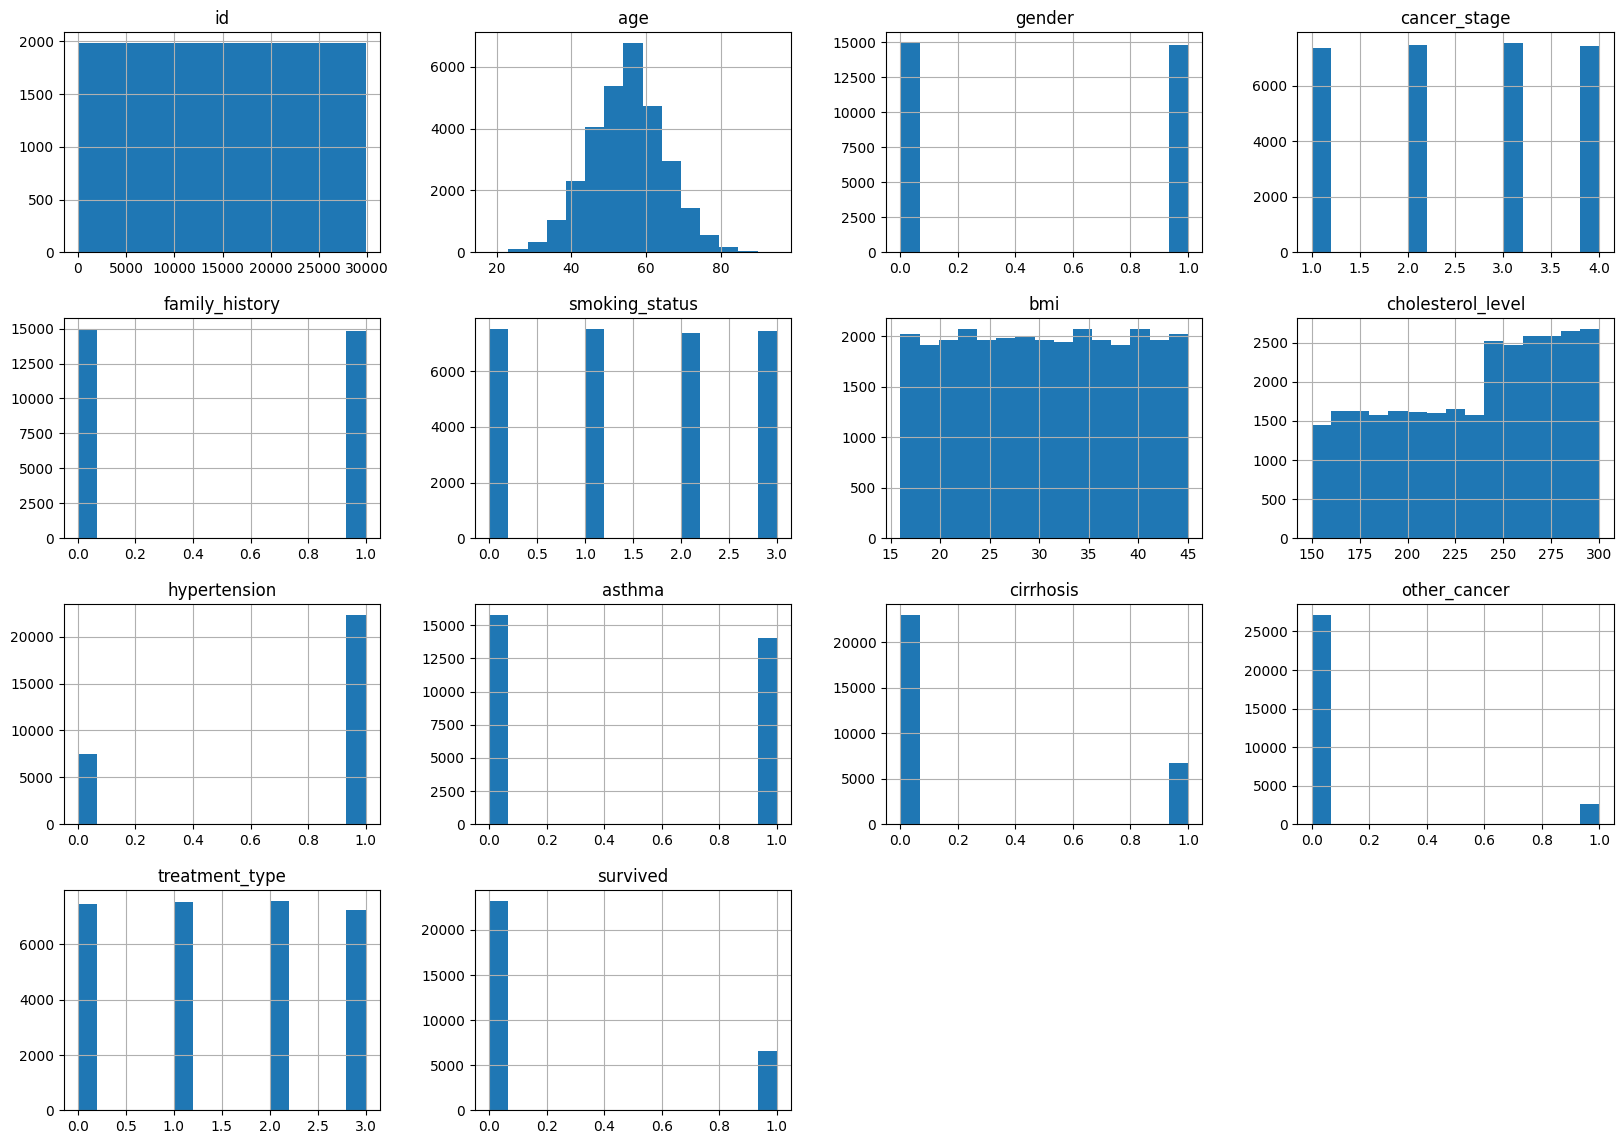

In [ ]:
# Plot histograms for all columns
datacan.hist(figsize=(20, 14), bins= 15)
plt.show()

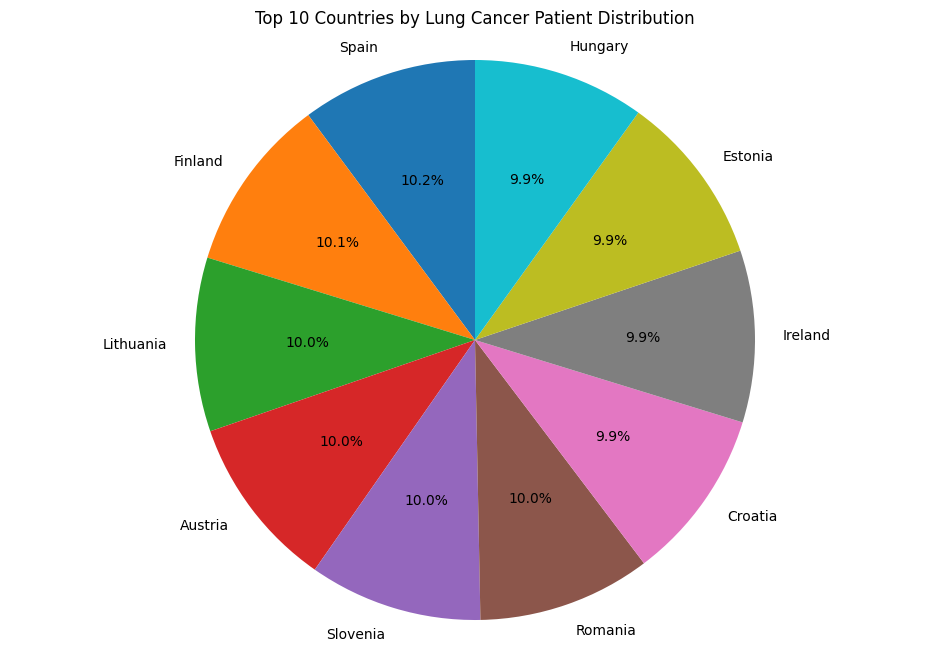

Top 10 countries:
country
Spain        1149
Finland      1142
Lithuania    1136
Austria      1134
Slovenia     1132
Romania      1132
Croatia      1124
Ireland      1123
Estonia      1122
Hungary      1122
Name: count, dtype: int64


In [ ]:
# Country distribution pie chart
country_counts = datacan['country'].value_counts().head(10)

plt.figure(figsize=(12, 8))
plt.pie(country_counts.values, labels=country_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Top 10 Countries by Lung Cancer Patient Distribution')
plt.axis('equal')
plt.show()

print("Top 10 countries:")
print(country_counts)

In [ ]:
# delete the information str  and i dont need that
#impact the acurcue the programe
for xy in ['end_treatment_date', 'diagnosis_date', 'country','id']:
    if xy in datacan.columns:
        datacan.drop(columns=xy, inplace=True)

In [ ]:
#show the table after edit
print(datacan.head())
print(datacan.describe(include='all'))
print(datacan.info())

   age  gender  cancer_stage  family_history  smoking_status   bmi  \
0   64       1             1               1               1  29.4   
1   50       0             3               1               1  41.2   
2   65       0             3               1               2  44.0   
3   51       0             1               0               1  43.0   
4   37       1             1               0               1  19.7   

   cholesterol_level  hypertension  asthma  cirrhosis  other_cancer  \
0                199             0       0          1             0   
1                280             1       1          0             0   
2                268             1       1          0             0   
3                241             1       1          0             0   
4                178             0       0          0             0   

   treatment_type  survived  
0               0         0  
1               1         1  
2               3         0  
3               0         0  
4 

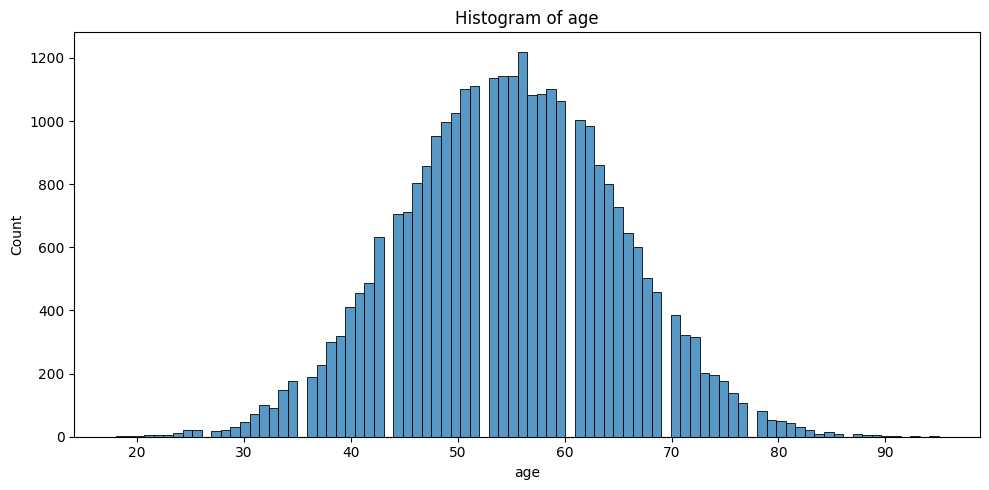

In [ ]:
#show th graph before remove thing neednt that and what i will do the data

plt.figure(figsize=(10, 5))
sns.histplot(datacan['age'])
plt.title("Histogram of age")
plt.xlabel('age')
plt.ylabel("Count")
plt.tight_layout()
plt.show()

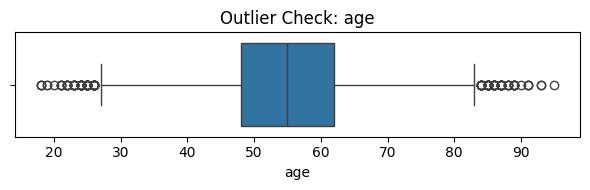

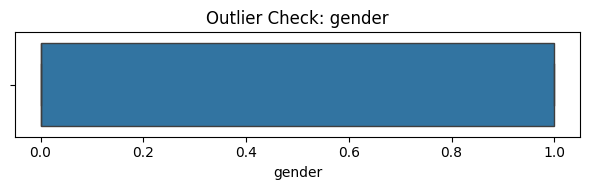

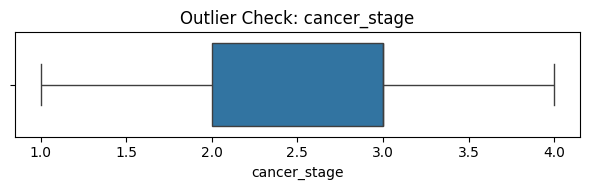

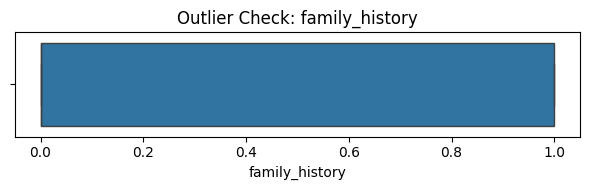

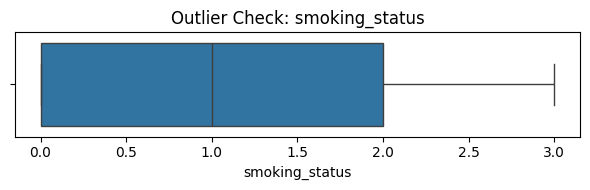

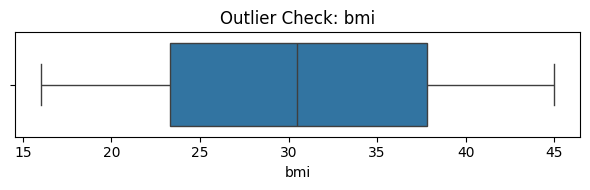

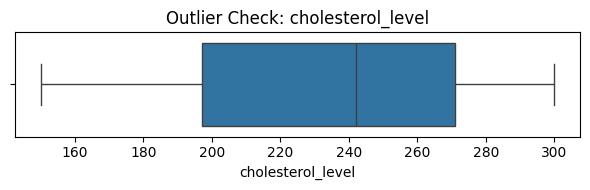

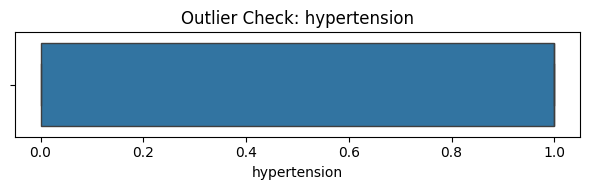

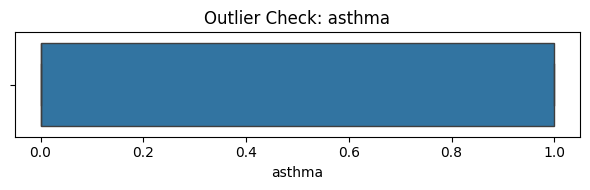

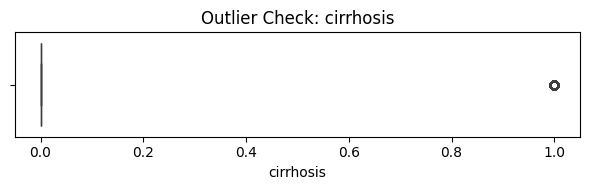

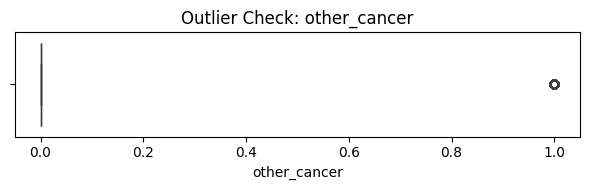

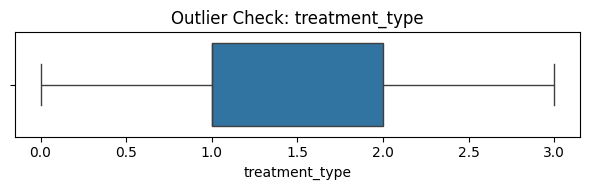

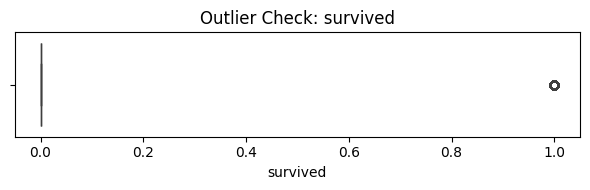

In [ ]:
#show boxplot
for col in datacan:
    plt.figure(figsize=(6, 2))
    sns.boxplot(data=datacan, x=col)
    plt.title(f"Outlier Check: {col}")
    plt.tight_layout()
    plt.show()

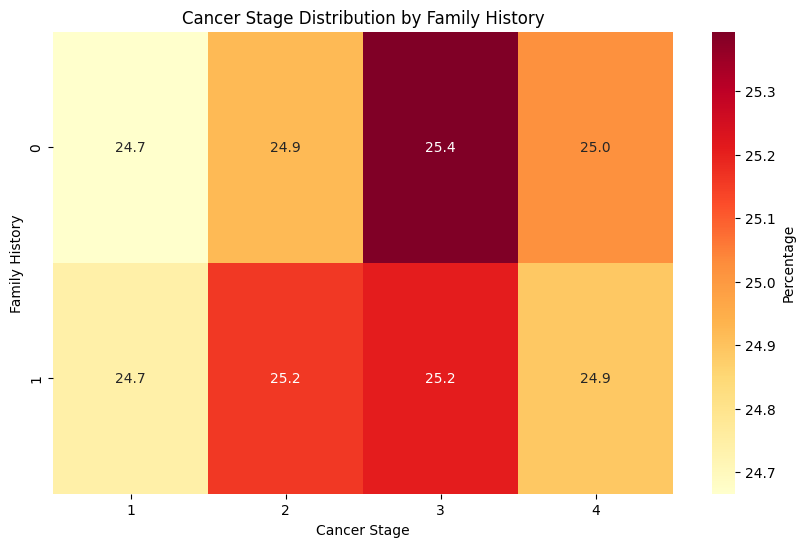

In [ ]:
# Family history vs cancer stage heatmap
family_stage_crosstab = pd.crosstab(datacan['family_history'], datacan['cancer_stage'], normalize='index') * 100

plt.figure(figsize=(10, 6))
sns.heatmap(family_stage_crosstab, annot=True, cmap='YlOrRd', fmt='.1f',
            cbar_kws={'label': 'Percentage'})
plt.title('Cancer Stage Distribution by Family History')
plt.xlabel('Cancer Stage')
plt.ylabel('Family History')
plt.show()


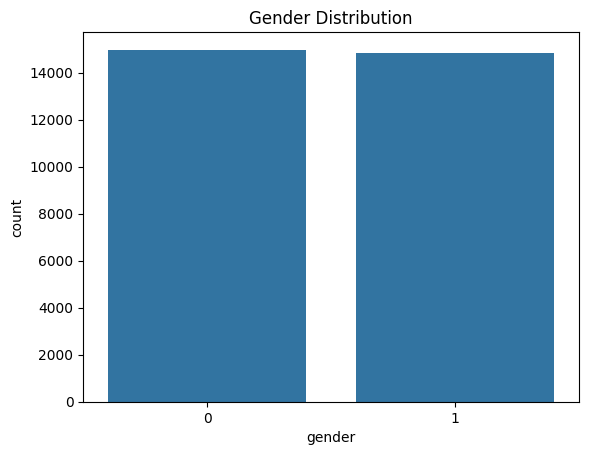

In [ ]:
# mean radius distribution plot
sns.countplot(x='gender', data=datacan)
plt.title('Gender Distribution')
plt.show()

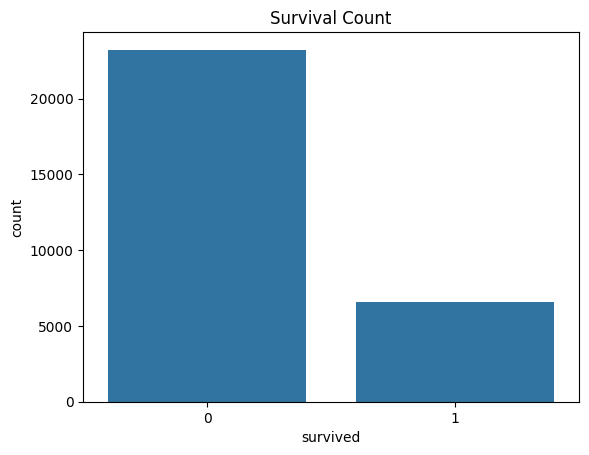

In [ ]:
#check target variable balance

sns.countplot( x='survived',data=datacan)
plt.title('Survival Count')
plt.show()

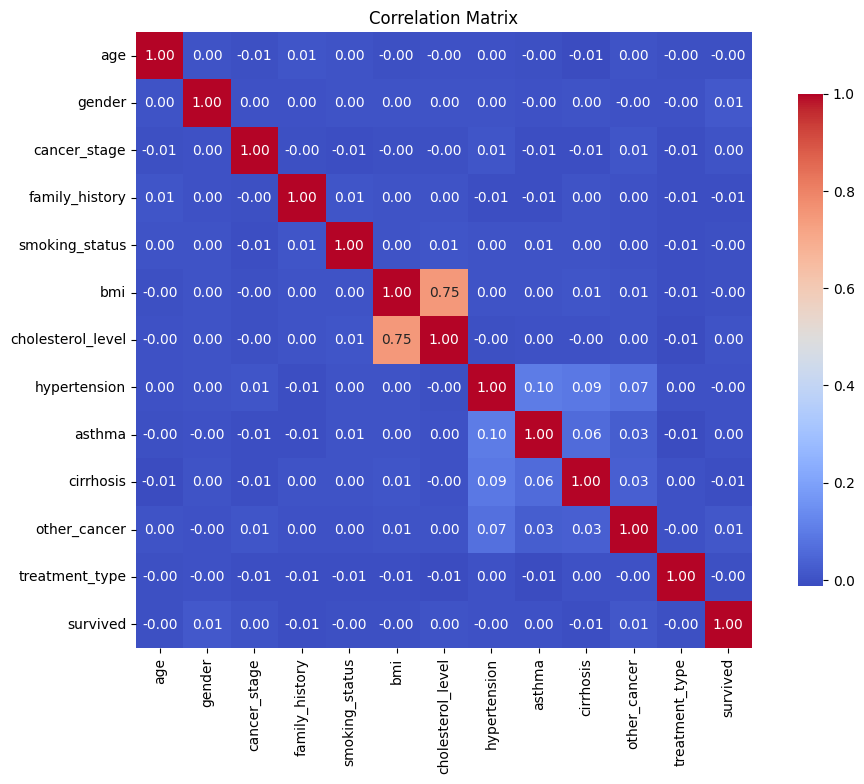

In [ ]:
# correlation matrix
correlation_matrix = datacan.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Encoding categorical variables

df_encoded = pd.get_dummies(
    datacan, columns=[
        'cancer_stage',
        'family_history',
        'smoking_status',
        'treatment_type'
    ],
    drop_first = True
)

In [ ]:
# Target and features

y = df_encoded['survived']
X = df_encoded.drop('survived',axis=1)


In [ ]:
columns_to_exclude = ['survived']
for column in datacan.select_dtypes(include=['float64', 'int64']).columns:
    if column not in columns_to_exclude:
        Q1 = datacan[column].quantile(0.25)
        Q3 = datacan[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        datacan = datacan[(datacan[column] >= lower_bound) & (datacan[column] <= upper_bound)]


In [ ]:
print(datacan['gender'].value_counts())
print(datacan.groupby('gender')['survived'].value_counts())

# Survival rate by gender
print(datacan.groupby('gender')['survived'].mean())

gender
0    10570
1    10436
Name: count, dtype: int64
gender  survived
0       0           8280
        1           2290
1       0           8077
        1           2359
Name: count, dtype: int64
gender
0    0.216651
1    0.226044
Name: survived, dtype: float64


In [ ]:
#Split and scale data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#Train and evaluate base model

logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train)
y_pred = logistic_model.predict(X_test_scaled)

# Accuracy
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred):.2%}")

Logistic Regression Accuracy: 77.82%


In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix,
                              index=['Actual Negative', 'Actual Positive'],
                              columns=['Predicted Negative', 'Predicted Positive'])
print("Confusion Matrix:\n", conf_matrix_df)

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
                  Predicted Negative  Predicted Positive
Actual Negative                4641                   0
Actual Positive                1323                   0
Classification Report:
               precision    recall  f1-score   support

           0       0.78      1.00      0.88      4641
           1       0.00      0.00      0.00      1323

    accuracy                           0.78      5964
   macro avg       0.39      0.50      0.44      5964
weighted avg       0.61      0.78      0.68      5964



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Top 3 coefficients
coefficients = pd.DataFrame({
    'Coefficient': logistic_model.coef_[0]
}, index=X.columns)
coefficients['Abs_Coefficient'] = coefficients['Coefficient'].abs()
coefficients['Effect'] = coefficients['Coefficient'].apply(lambda x: 'Increases Survival' if x > 0 else 'Decreases Survival')

top_features = coefficients.nlargest(3, 'Abs_Coefficient')
print("Top 3 features contributing to Survival:")
print(top_features[['Coefficient', 'Effect']])

Top 3 features contributing to Survival:
                  Coefficient              Effect
gender               0.033990  Increases Survival
smoking_status_1     0.026171  Increases Survival
age                 -0.021812  Decreases Survival


In [ ]:
#train model
models = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(class_weight='balanced'),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier()
}

results = []
f1_scores = {}

In [ ]:
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1
    })
f1_scores[name] = f1

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Model Comparison Results:
                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.778169   0.000000  0.000000  0.000000
1                  SVM  0.521797   0.223308  0.466364  0.302007
2        Decision Tree  0.641683   0.220467  0.242630  0.231018
3        Random Forest  0.774313   0.290909  0.012094  0.023222
4                  KNN  0.732059   0.196468  0.067271  0.100225


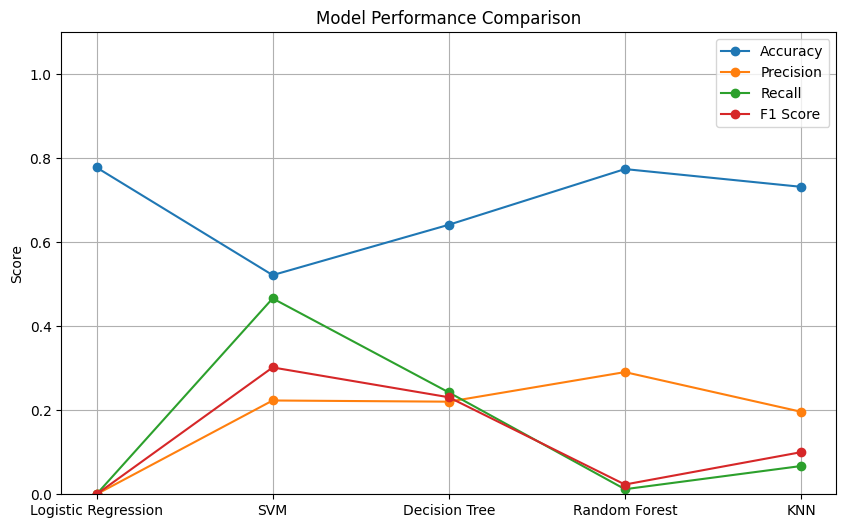

In [ ]:
# Visualize performance
results_df = pd.DataFrame(results)
print("\nModel Comparison Results:")
print(results_df)

plt.figure(figsize=(10, 6))
for metric in ['Accuracy', 'Precision', 'Recall', 'F1 Score']:
    plt.plot(results_df['Model'], results_df[metric], marker='o', label=metric)
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.ylim(0, 1.1)
plt.legend()
plt.grid(True)
plt.show()

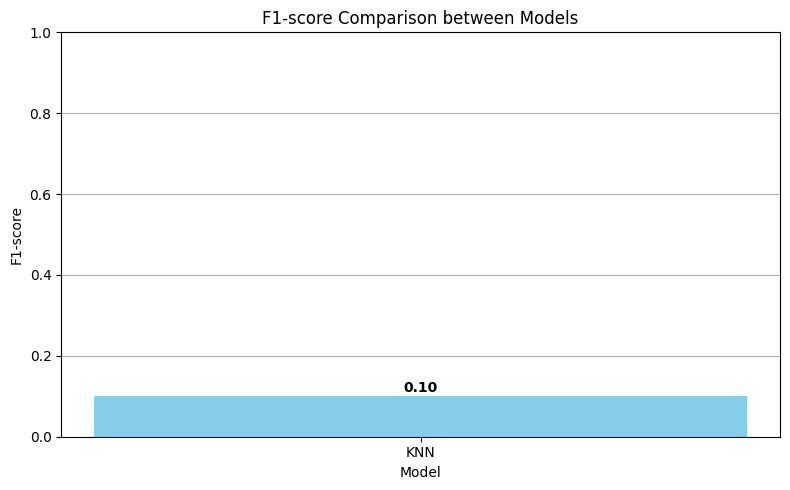

In [ ]:
# F1 Bar Chart
plt.figure(figsize=(8, 5))
plt.bar(f1_scores.keys(), f1_scores.values(), color='skyblue')
plt.title("F1-score Comparison between Models")
plt.xlabel("Model")
plt.ylabel("F1-score")
plt.ylim(0, 1)
plt.grid(axis='y')
for i, (model, score) in enumerate(f1_scores.items()):
    plt.text(i, score + 0.01, f"{score:.2f}", ha='center', fontweight='bold')
plt.tight_layout()
plt.show()

In [ ]:
# Cross-Validation

print("\nCross-Validation Scores:")
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5)
    print(f"{name}: Mean CV Accuracy = {scores.mean():.2f}")

In [ ]:
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)


scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)
X_test_scaled = scaler.transform(X_test)


In [ ]:
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced', random_state=42),
    "SVM": SVC(class_weight='balanced', random_state=42),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced', random_state=42),
    "Random Forest": RandomForestClassifier(class_weight='balanced', random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}


In [ ]:
results = []

for name, model in models.items():
    if name == "KNN":
        model.fit(X_resampled_scaled, y_resampled)
    else:
        model.fit(X_resampled_scaled, y_resampled)

    y_pred = model.predict(X_test_scaled)

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, zero_division=0),
        "Recall": recall_score(y_test, y_pred, zero_division=0),
        "F1 Score": f1_score(y_test, y_pred, zero_division=0)
    })

In [ ]:
df_results = pd.DataFrame(results)
print("\nImproved Model Comparison Results:")
print(df_results.sort_values(by="F1 Score", ascending=False))


Improved Model Comparison Results:
                 Model  Accuracy  Precision    Recall  F1 Score
4                  KNN  0.499329   0.223295  0.507181  0.310074
1                  SVM  0.512240   0.224653  0.489040  0.307875
3        Random Forest  0.504863   0.221653  0.490552  0.305340
2        Decision Tree  0.488934   0.215440  0.493575  0.299954
0  Logistic Regression  0.492455   0.216000  0.489796  0.299792


In [ ]:
# Cross-Validation

print("\nCross-Validation Scores:")
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5)
    print(f"{name}: Mean CV Accuracy = {scores.mean():.2f}")


Cross-Validation Scores:


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression: Mean CV Accuracy = 0.51
SVM: Mean CV Accuracy = 0.53
Decision Tree: Mean CV Accuracy = 0.66
Random Forest: Mean CV Accuracy = 0.78
KNN: Mean CV Accuracy = 0.74



Model Comparison Results:
                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.492455   0.216000  0.489796  0.299792
1                  SVM  0.512240   0.224653  0.489040  0.307875
2        Decision Tree  0.488934   0.215440  0.493575  0.299954
3        Random Forest  0.504863   0.221653  0.490552  0.305340
4                  KNN  0.499329   0.223295  0.507181  0.310074


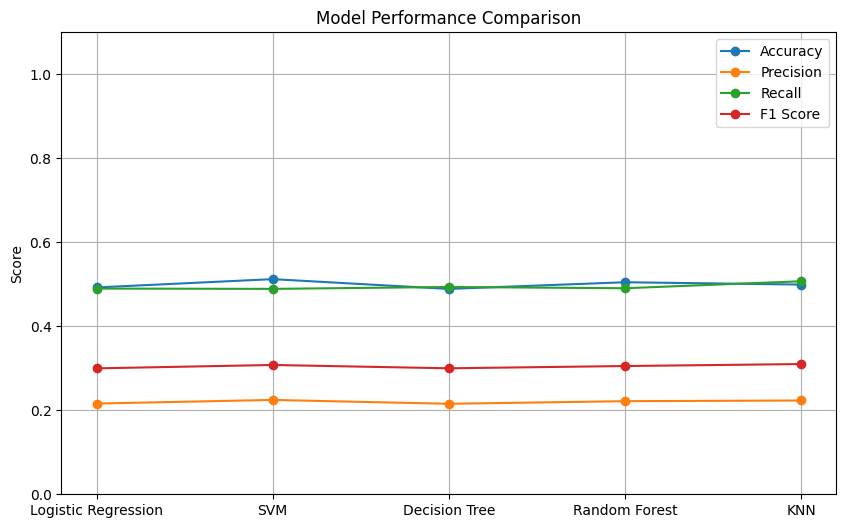

In [ ]:
# Visualize performance
results_df = pd.DataFrame(results)
print("\nModel Comparison Results:")
print(results_df)

plt.figure(figsize=(10, 6))
for metric in ['Accuracy', 'Precision', 'Recall', 'F1 Score']:
    plt.plot(results_df['Model'], results_df[metric], marker='o', label=metric)
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.ylim(0, 1.1)
plt.legend()
plt.grid(True)
plt.show()

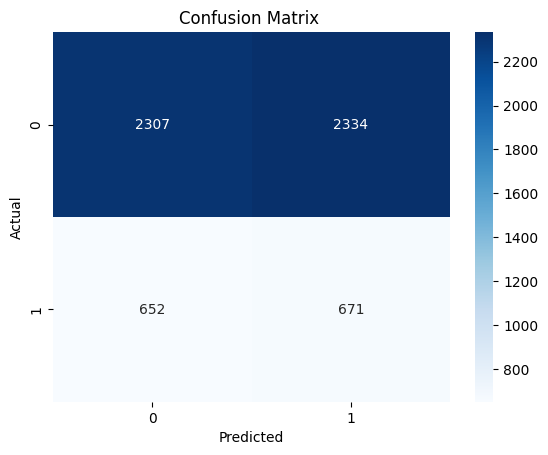

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix ')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#
for name, model in models.items():
    with open(f'{name.replace(" ", "_").lower()}_model.pkl', 'wb') as f:
        pickle.dump(model, f)

In [ ]:
# Save trained models

for name, model in models.items():
    with open(f'{name.replace(" ", "_").lower()}_model.pkl', 'wb') as f:
        pickle.dump(model, f)

In [ ]:
# save the new values after that remove the text
#datacan.to_csv('Lung Cancer.csv')